# GRIP - The Sparks Foundation Task - 4

## Task 4 - Exploratory Data Analysis - Terrorism

### Performed By - Akash Todkar

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
import statsmodels

## Import Dataset

In [2]:
df = pd.read_csv("globalterrorismdb.csv",encoding='latin1')
df

C:\Users\akash\AppData\Local\Temp\ipykernel_13972\4164344165.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("globalterrorismdb.csv",encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

## Rename The Columns

In [4]:
df = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',
                   'region_txt':'Region','city':'City','success':'Success','suicide':'Suicide','attacktype1_txt':'Attack_Type',
                   'targtype1_txt':'Target_Type','gname':'Attack_Group',
                   'weaptype1_txt':'Weapon','nkill':'Number_of_Killed'},inplace=True)
df.head()

C:\Users\akash\AppData\Local\Temp\ipykernel_13972\2724143917.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','country_txt':'Country',


,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


## Checking The Information of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Day               181691 non-null  int64  
 3   Extended          181691 non-null  int64  
 4   Country           181691 non-null  object 
 5   Region            181691 non-null  object 
 6   City              181257 non-null  object 
 7   Success           181691 non-null  int64  
 8   Suicide           181691 non-null  int64  
 9   Attack_Type       181691 non-null  object 
 10  Target_Type       181691 non-null  object 
 11  Attack_Group      181691 non-null  object 
 12  Weapon            181691 non-null  object 
 13  Number_of_Killed  171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


## Univariate Analysis

In [6]:
df.describe()

,Year,Month,Day,Extended,Success,Suicide,Number_of_Killed
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.403272
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.545741
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [7]:
df.head()

,Year,Month,Day,Extended,Country,Region,City,Success,Suicide,Attack_Type,Target_Type,Attack_Group,Weapon,Number_of_Killed
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [8]:
df.corr()

,Year,Month,Day,Extended,Success,Suicide,Number_of_Killed
Year,1.000000,0.000139,0.018254,0.091754,-0.082963,0.137736,0.015341
Month,0.000139,1.000000,0.005497,-0.000468,-0.002845,0.003071,0.003463
Day,0.018254,0.005497,1.000000,-0.004700,-0.011802,0.003593,-0.003693
Extended,0.091754,-0.000468,-0.004700,1.000000,0.073233,-0.033961,0.027737
Success,-0.082963,-0.002845,-0.011802,0.073233,1.000000,-0.031155,0.053115
Suicide,0.137736,0.003071,0.003593,-0.033961,-0.031155,1.000000,0.136086
Number_of_Killed,0.015341,0.003463,-0.003693,0.027737,0.053115,0.136086,1.000000


<AxesSubplot:>

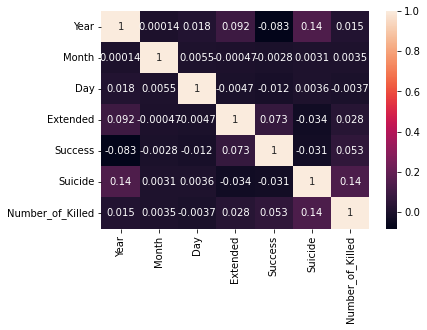

In [9]:
sns.heatmap(df.corr(),annot = True)

## Checking Null Values

In [10]:
df.isna().sum()

Year                    0
Month                   0
Day                     0
Extended                0
Country                 0
Region                  0
City                  434
Success                 0
Suicide                 0
Attack_Type             0
Target_Type             0
Attack_Group            0
Weapon                  0
Number_of_Killed    10313
dtype: int64

## Replacing Null Values

In [11]:
df["City"].fillna("Unknown", inplace = True) 
df["Number_of_Killed"].fillna(0, inplace = True) 

C:\Users\akash\AppData\Local\Temp\ipykernel_13972\1769461693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["City"].fillna("Unknown", inplace = True)
C:\Users\akash\AppData\Local\Temp\ipykernel_13972\1769461693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Number_of_Killed"].fillna(0, inplace = True)


In [12]:
df.isna().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
Region              0
City                0
Success             0
Suicide             0
Attack_Type         0
Target_Type         0
Attack_Group        0
Weapon              0
Number_of_Killed    0
dtype: int64

## Checking Duplicates Rows And Remove Them

In [13]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (15707, 14)


In [14]:
df = df.drop_duplicates()

In [15]:
df.shape

(165984, 14)

## Analysis And Visualization of The Data

Text(0.5, 1.0, 'Number Of Terrorist Activities In Each Year')

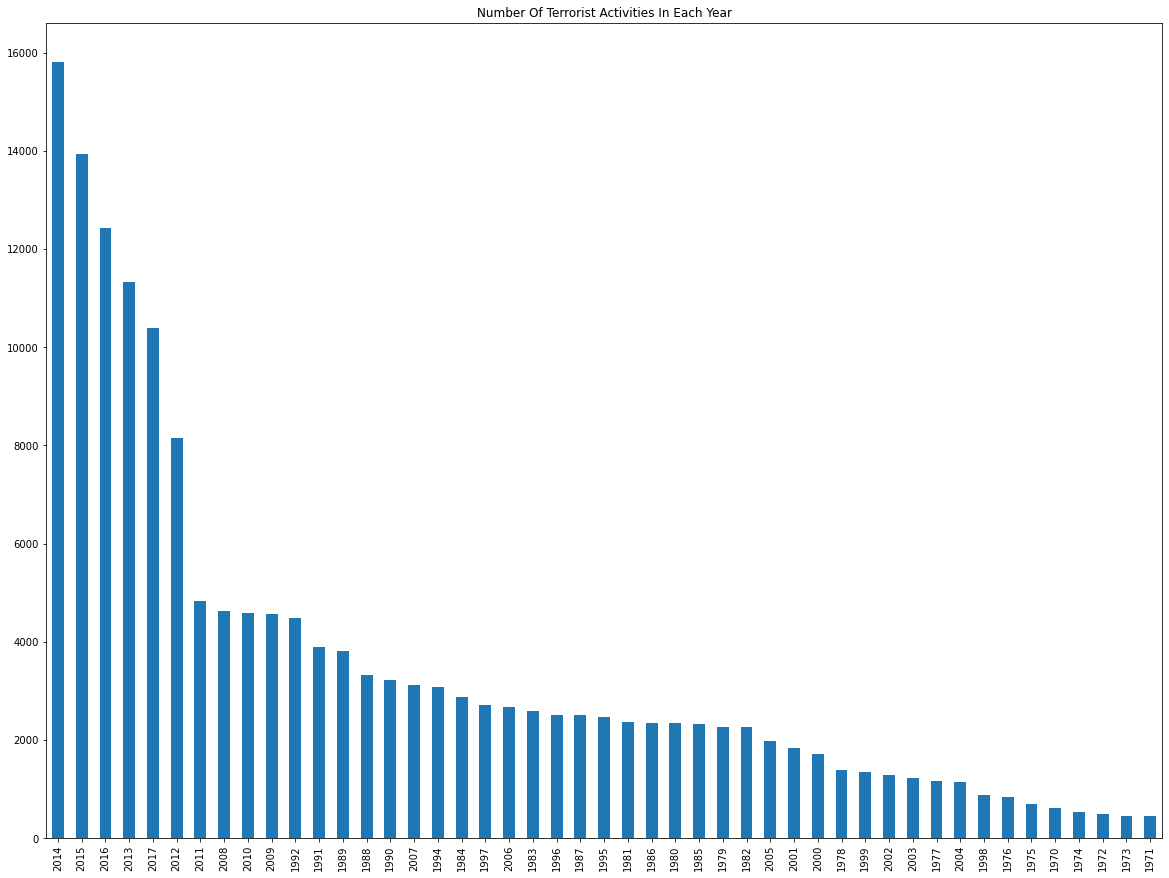

In [16]:
df['Year'].value_counts().plot(kind='bar',figsize=[20,15])
plt.title('Number Of Terrorist Activities In Each Year')

###  Here we can see that in recent years the terrorists activities are increased.

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Cities')

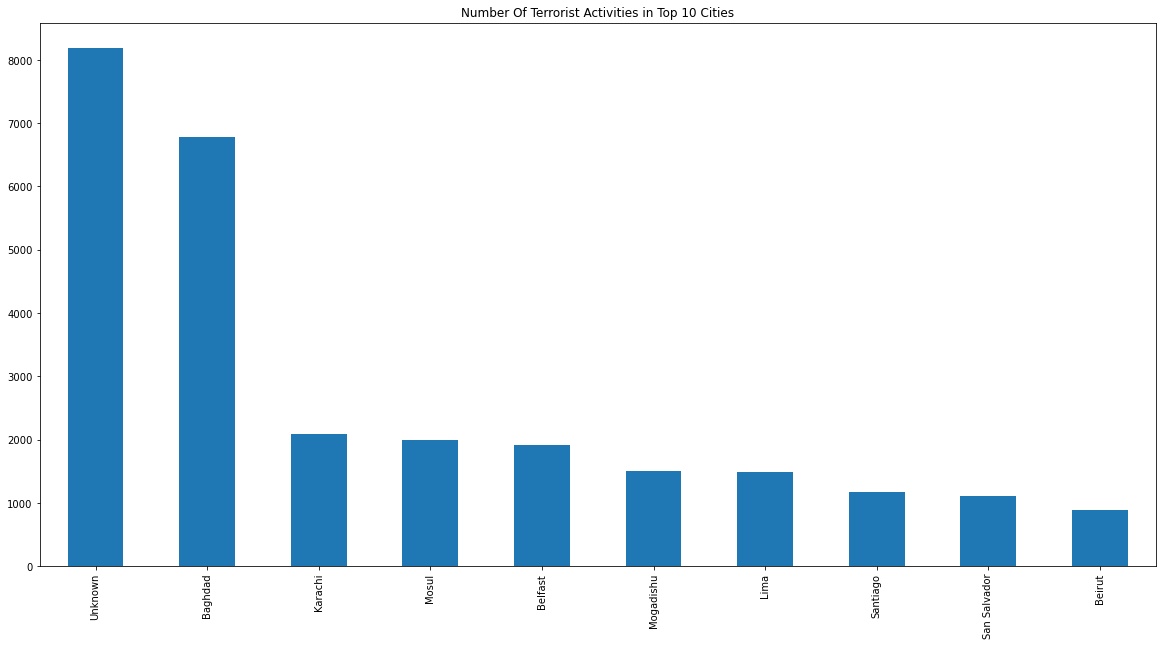

In [17]:
df['City'].value_counts().head(10).plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities in Top 10 Cities')

### Here we can see that in the unknown city and the Baghdad city which is known, terrorist activities are high as compared to other cities.

Text(0.5, 1.0, 'Number Of Terrorist Activities in Region')

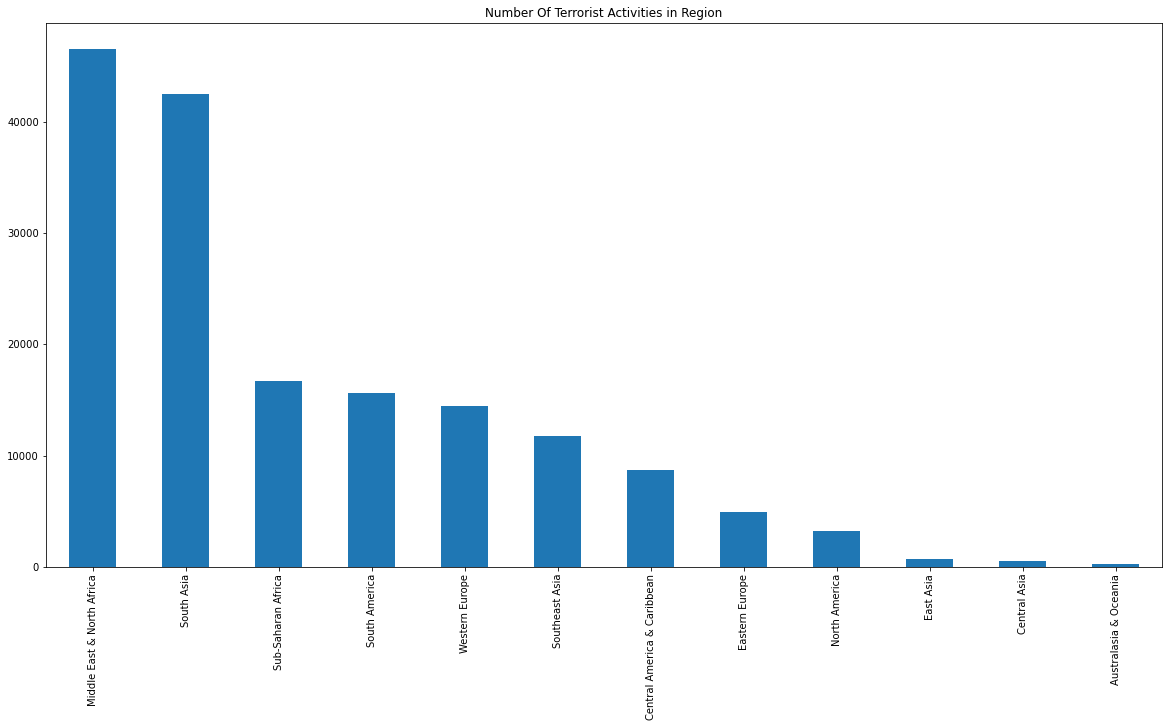

In [18]:
df['Region'].value_counts().plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities in Region')

### In Middle East and North Africa and South Asia region terrorist activities are high as compared to other region.

Text(0.5, 1.0, 'Number Of Terrorist Activities in Top 10 Countries')

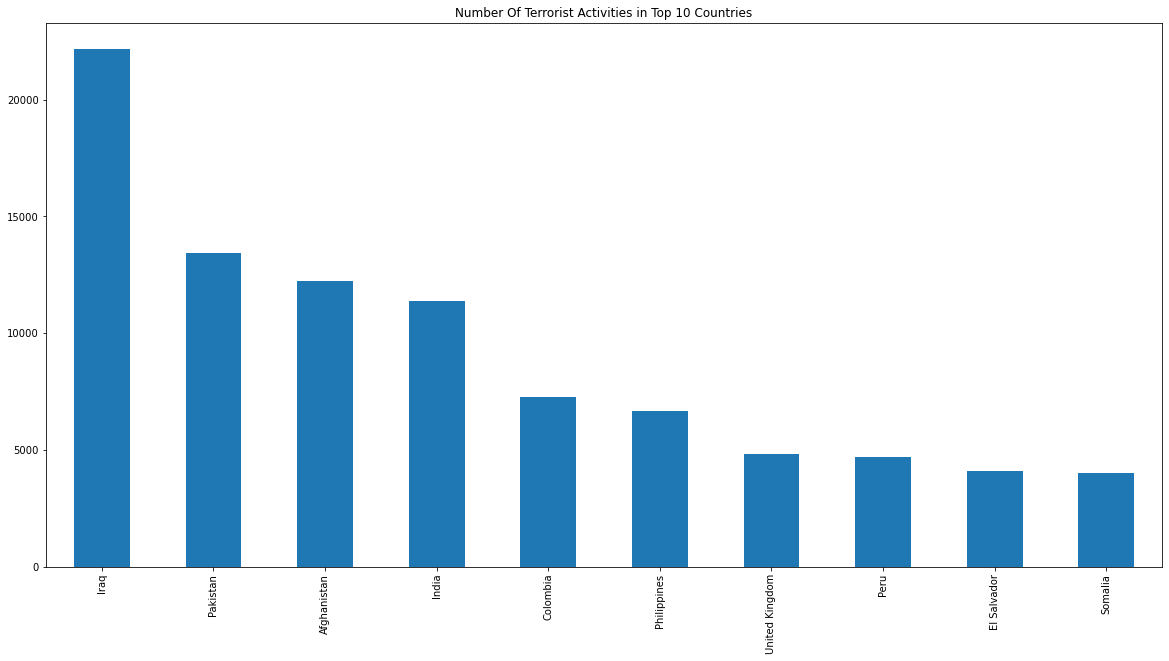

In [19]:
df['Country'].value_counts().head(10).plot(kind='bar',figsize=[20,10])
plt.title('Number Of Terrorist Activities in Top 10 Countries')

### As from above plot there is high terrorist activities in Iraq and Pakistan country as compared to other countries.

In [20]:
data = df.groupby("Attack_Type")["Number_of_Killed"].sum()
data

Attack_Type
Armed Assault                          157628.0
Assassination                           24221.0
Bombing/Explosion                      153469.0
Facility/Infrastructure Attack           3575.0
Hijacking                                3717.0
Hostage Taking (Barricade Incident)      4454.0
Hostage Taking (Kidnapping)             23805.0
Unarmed Assault                           880.0
Unknown                                 31654.0
Name: Number_of_Killed, dtype: float64

Text(0.5, 1.0, 'Favorite Attack Methods')

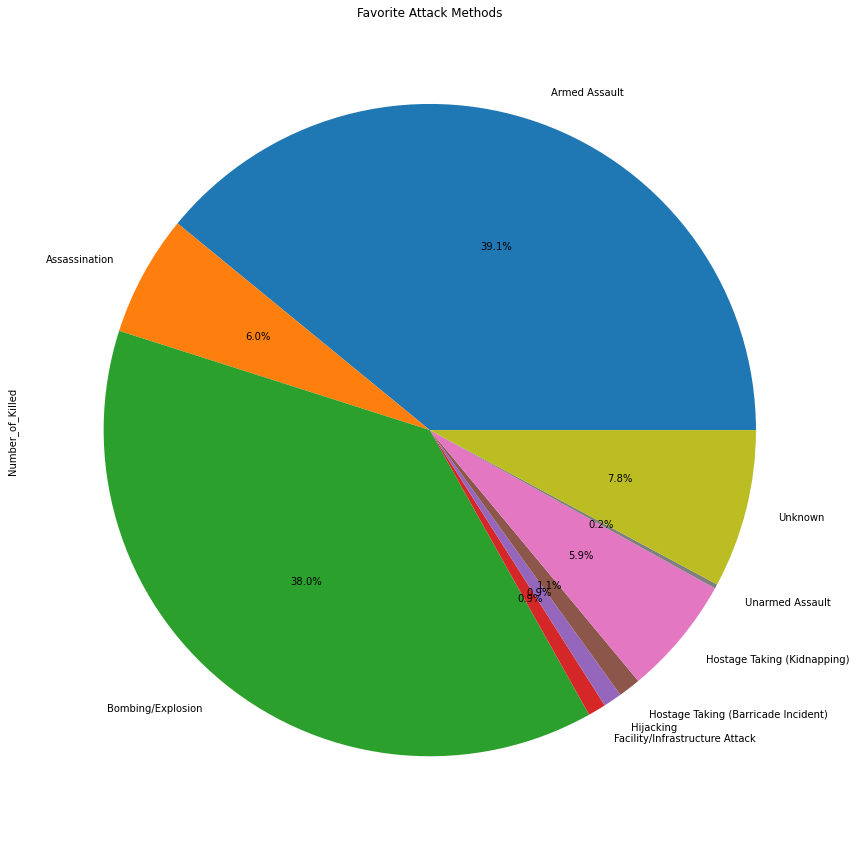

In [21]:
data.plot.pie(figsize=[20,15],autopct="%0.1f%%")
plt.title("Favorite Attack Methods")

### Armed Assault and Bombing/Explosion are seen to be the cause of 77% of the deaths in these method of attacks. This rate is why these attacks are used so many times in terrorist actions. This is the dangerous weapons and explosives in the world.

In [22]:
data = df.groupby("Target_Type")["Number_of_Killed"].sum()
data

Target_Type
Abortion Related                       9.0
Airports & Aircraft                 3767.0
Business                           22994.0
Educational Institution             3666.0
Food or Water Supply                 313.0
Government (Diplomatic)             2985.0
Government (General)               25655.0
Journalists & Media                 1491.0
Maritime                            1190.0
Military                          104457.0
NGO                                 1056.0
Other                                252.0
Police                             52529.0
Private Citizens & Property       136886.0
Religious Figures/Institutions     13155.0
Telecommunication                    174.0
Terrorists/Non-State Militia        8941.0
Tourists                             753.0
Transportation                     13768.0
Unknown                             3991.0
Utilities                           1856.0
Violent Political Party             3515.0
Name: Number_of_Killed, dtype: float64

Text(0.5, 1.0, 'Favorite Target Area of The Terrorist')

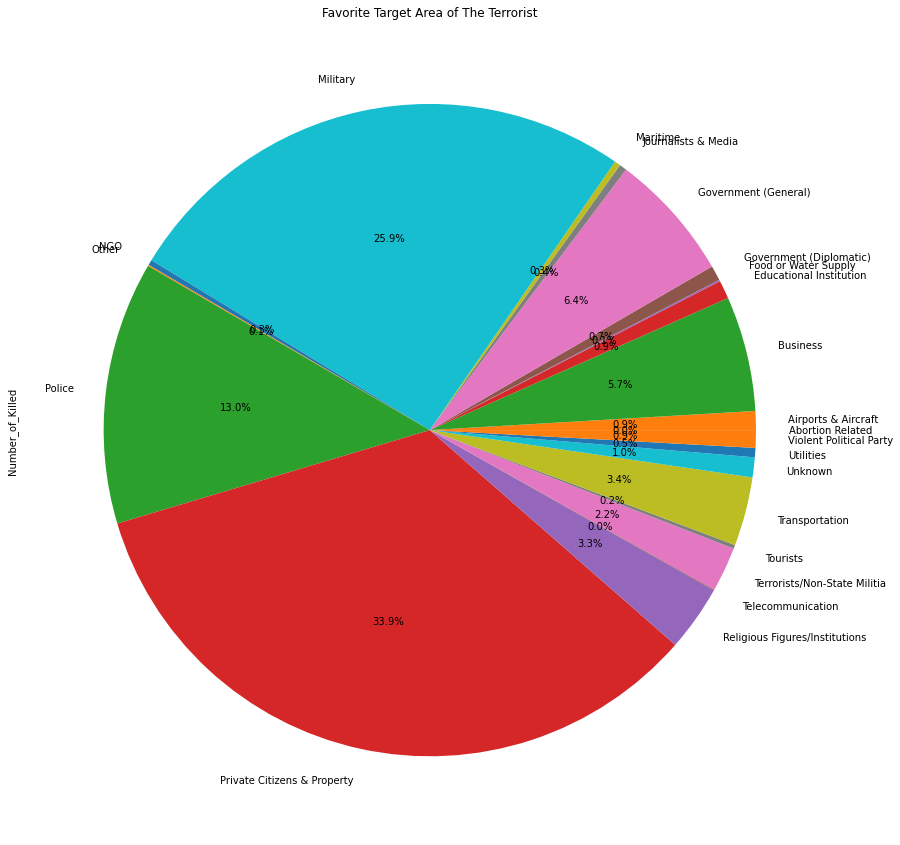

In [23]:
data.plot.pie(figsize=[20,15],autopct="%0.1f%%")
plt.title("Favorite Target Area of The Terrorist")

### The main target area of the terrorists are Private Citizens and Property and also Military area. From this target area nearly 60% peoples were died.

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


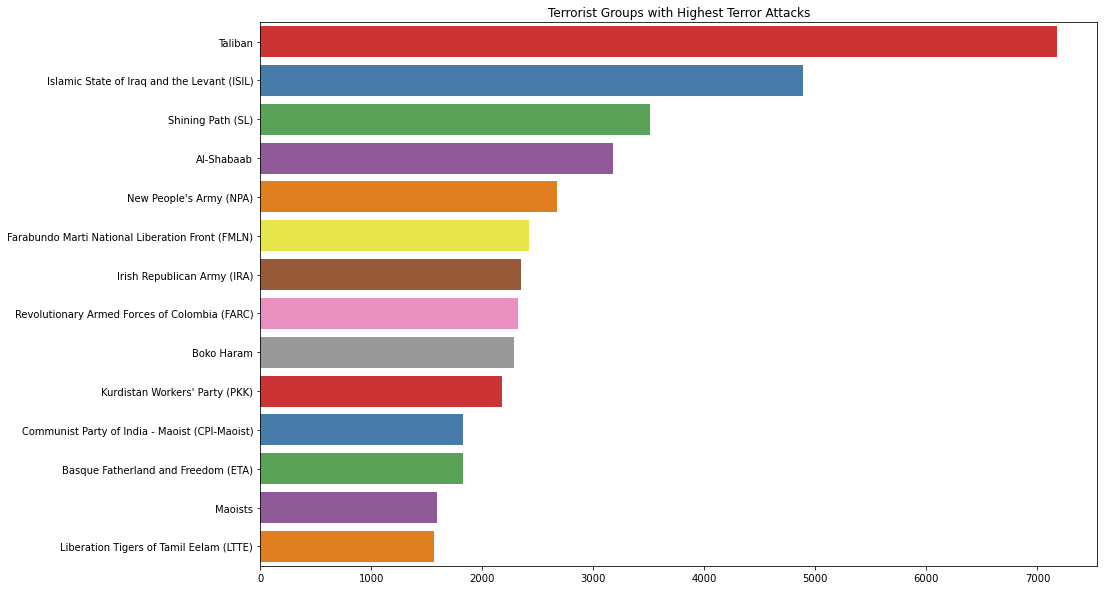

In [30]:
sns.barplot(df['Attack_Group'].value_counts()[1:15].values,df['Attack_Group'].value_counts()[1:15].index,palette=('Set1'))
plt.xticks(rotation=0)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

### Here we can see that the terrorist groups which are Taliban and Islamic State of Iraq and the Levant (ISIL) having highest terrorist attacks.

In [31]:
data = df.groupby("Weapon")["Number_of_Killed"].sum()
data

Weapon
Biological                                                                          9.0
Chemical                                                                          624.0
Explosives                                                                     170027.0
Fake Weapons                                                                        1.0
Firearms                                                                       171833.0
Incendiary                                                                       5298.0
Melee                                                                           10474.0
Other                                                                             122.0
Radiological                                                                        2.0
Sabotage Equipment                                                                 83.0
Unknown                                                                         41746.0
Vehicle (not to include v

Text(0.5, 1.0, 'Favorite Target Area of The Terrorist')

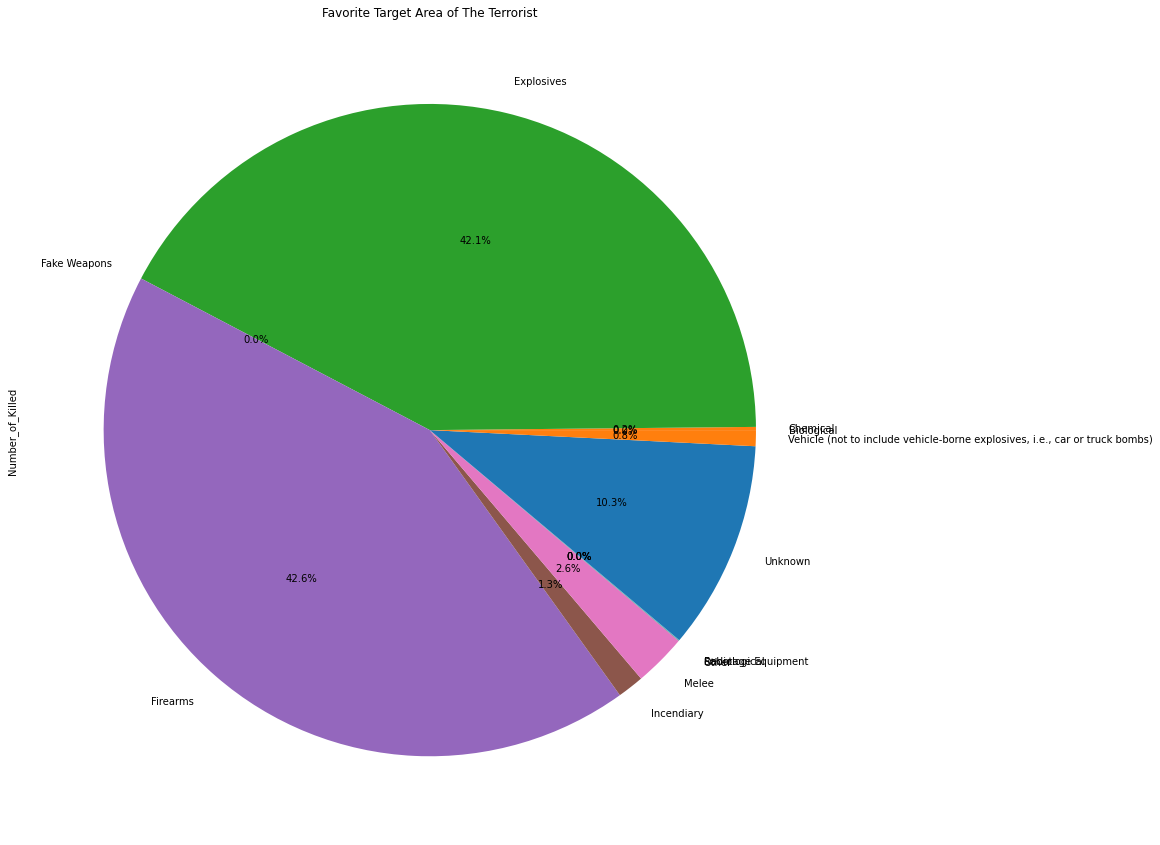

In [32]:
data.plot.pie(figsize=[20,15],autopct="%0.1f%%")
plt.title("Highest Weapons Used By The Terrorist")

### As we can see Explosives and Firearms are mostly used weapons by the Terrorists.

1    147388
0     18596
Name: Success, dtype: int64


Text(0.5, 1.0, 'Success terrorist operations')

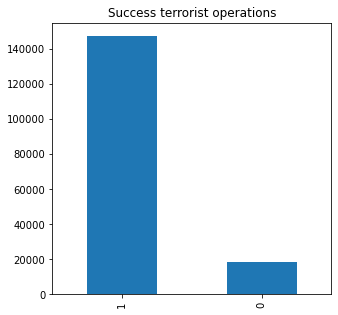

In [33]:
df['Success'].value_counts().plot(kind='bar',figsize=[5,5])
print(df['Success'].value_counts())
plt.title("Success terrorist operations")

### Here we can see that success rate of the terrorists are High.

In [34]:
data = df.groupby("Country")["Number_of_Killed"].sum()
data

Country
Afghanistan    38718.0
Albania           41.0
Algeria        10963.0
Andorra            0.0
Angola          3028.0
                ...   
Yemen           8402.0
Yugoslavia       119.0
Zaire            324.0
Zambia            69.0
Zimbabwe         154.0
Name: Number_of_Killed, Length: 205, dtype: float64

Text(0.5, 1.0, 'Highest Weapons Used By The Terrorist')

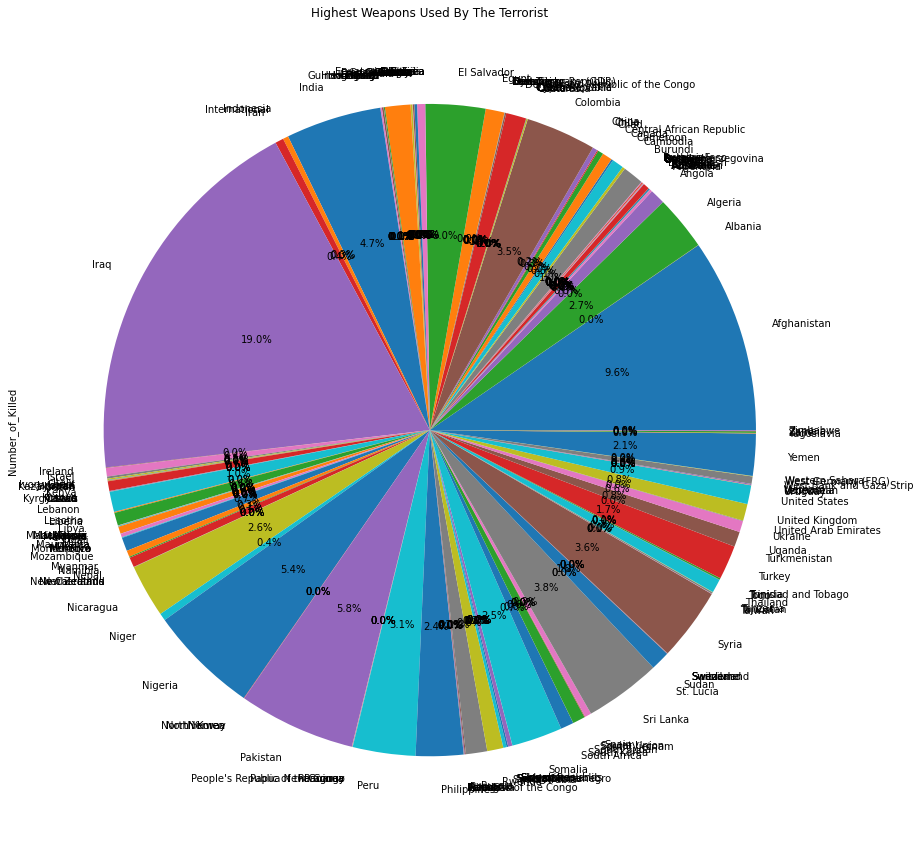

In [37]:
data.plot.pie(figsize=[20,15],autopct="%0.1f%%")
plt.title("Highest Weapons Used By The Terrorist")

### Here we can see that most number of peoples are killed from Iraq and Afghanistan country by the terrorist attacks. the success rate of the terrorist is high so its very serious problems. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.

# Thank You....!